In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score, classification_report, roc_curve 

In [2]:
df = pd.read_excel("Election_Data.xlsx", sheet_name='Election_Dataset_Two Classes')

In [3]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
vote,1525,2,Labour,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1525.0,NaN,NaN,NaN,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,NaN,NaN,NaN,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,NaN,NaN,NaN,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,NaN,NaN,NaN,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,NaN,NaN,NaN,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,NaN,NaN,NaN,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,NaN,NaN,NaN,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0
gender,1525,2,female,812,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.duplicated().sum()

8

In [9]:
df = df.drop_duplicates().reset_index(drop=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1517 non-null   object
 1   age                      1517 non-null   int64 
 2   economic.cond.national   1517 non-null   int64 
 3   economic.cond.household  1517 non-null   int64 
 4   Blair                    1517 non-null   int64 
 5   Hague                    1517 non-null   int64 
 6   Europe                   1517 non-null   int64 
 7   political.knowledge      1517 non-null   int64 
 8   gender                   1517 non-null   object
dtypes: int64(7), object(2)
memory usage: 106.8+ KB


<AxesSubplot:xlabel='vote', ylabel='count'>

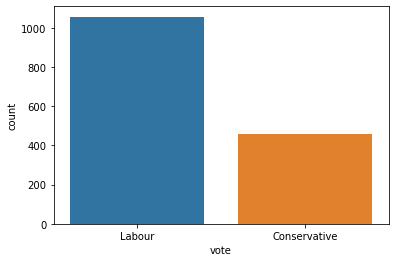

In [11]:
sns.countplot(data=df, x='vote')

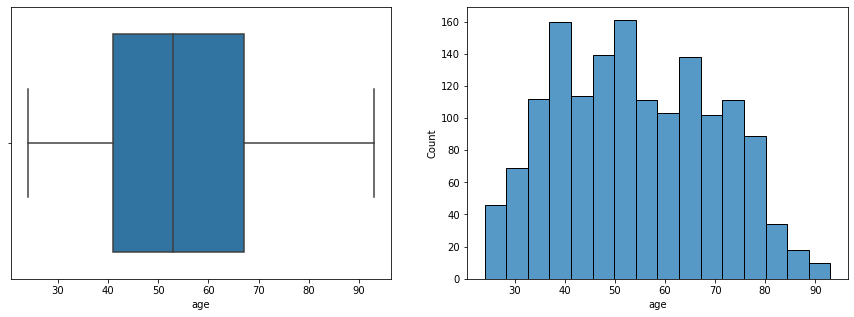

In [12]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,5)
sns.boxplot(x="age", data=df, ax=axes[0])
sns.histplot(x="age", data=df, ax=axes[1])
plt.show()

<AxesSubplot:xlabel='economic.cond.national', ylabel='count'>

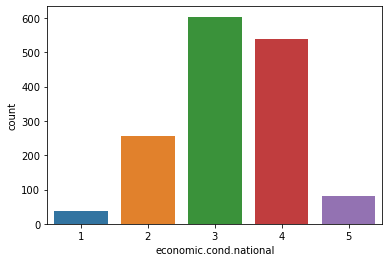

In [13]:
sns.countplot(data=df, x='economic.cond.national')

<AxesSubplot:xlabel='economic.cond.household', ylabel='count'>

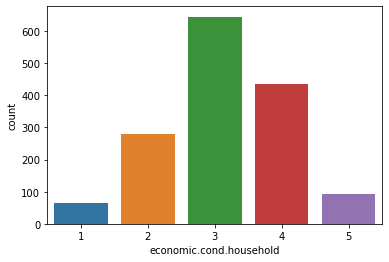

In [14]:
sns.countplot(data=df, x='economic.cond.household')

<AxesSubplot:xlabel='Blair', ylabel='count'>

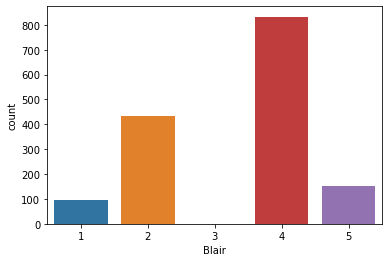

In [15]:
sns.countplot(data=df, x='Blair')

<AxesSubplot:xlabel='Hague', ylabel='count'>

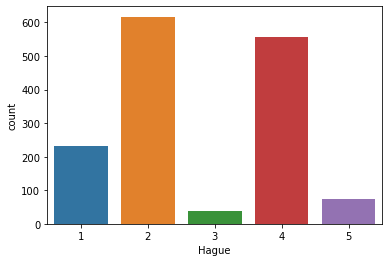

In [16]:
sns.countplot(data=df, x='Hague')

<AxesSubplot:xlabel='Europe', ylabel='count'>

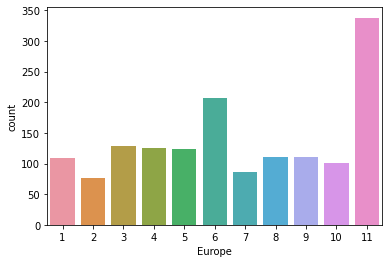

In [17]:
sns.countplot(data=df, x='Europe')

<AxesSubplot:xlabel='political.knowledge', ylabel='count'>

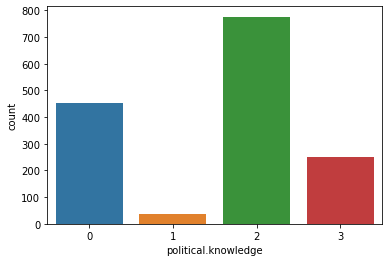

In [18]:
sns.countplot(data=df, x='political.knowledge')

<AxesSubplot:xlabel='gender', ylabel='count'>

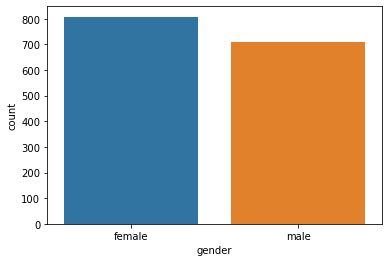

In [19]:
sns.countplot(data=df, x='gender')

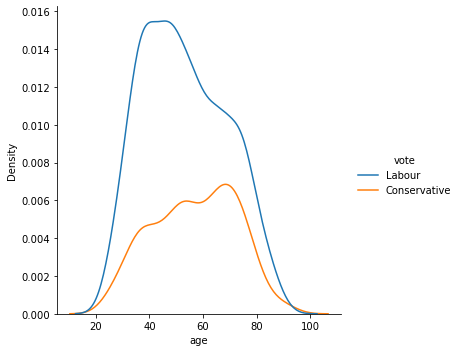

In [20]:
sns.displot(data=df, kind='kde', x='age', hue='vote')

<AxesSubplot:xlabel='gender', ylabel='count'>

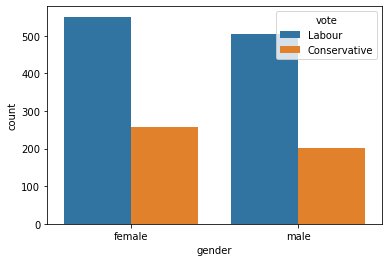

In [21]:
sns.countplot(data=df, x='gender', hue='vote')

# Insight 1: Preference of both Male and Female voters is towards Labour Party

<AxesSubplot:xlabel='age', ylabel='vote'>

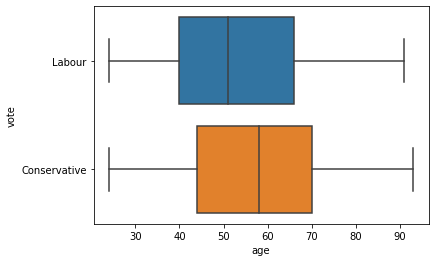

In [22]:
sns.boxplot(data=df, x='age', y='vote')

# Insight 2: Clearly visible that the younger population prefers the Labour party as comparted to the Conservative party

<AxesSubplot:xlabel='political.knowledge', ylabel='count'>

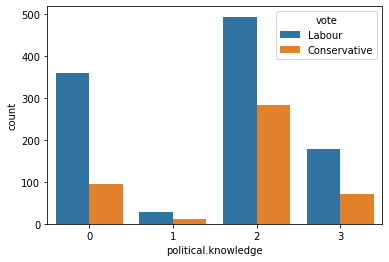

In [23]:
sns.countplot(data=df, x='political.knowledge', hue='vote')

<AxesSubplot:xlabel='economic.cond.national', ylabel='count'>

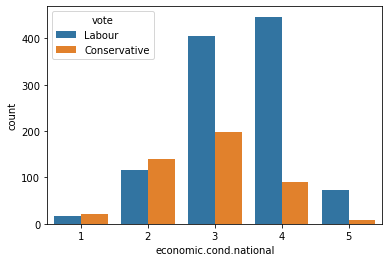

In [24]:
sns.countplot(data=df, x='economic.cond.national', hue='vote')

<AxesSubplot:xlabel='economic.cond.household', ylabel='count'>

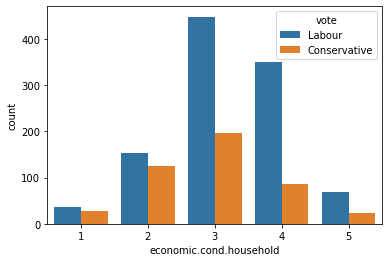

In [25]:
sns.countplot(data=df, x='economic.cond.household', hue='vote')

<AxesSubplot:xlabel='Blair', ylabel='count'>

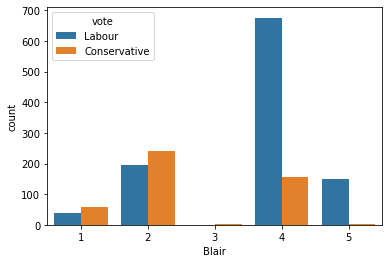

In [26]:
sns.countplot(data=df, x='Blair', hue='vote')

<AxesSubplot:xlabel='Hague', ylabel='count'>

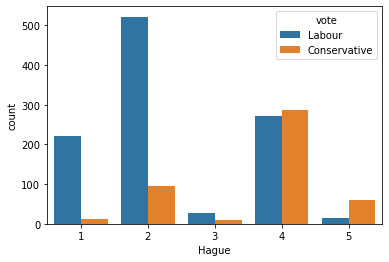

In [27]:
sns.countplot(data=df, x='Hague', hue='vote')

In [28]:
df[(df['Hague']>df['Blair']) & (df['vote']=='Labour')].count()

vote                       100
age                        100
economic.cond.national     100
economic.cond.household    100
Blair                      100
Hague                      100
Europe                     100
political.knowledge        100
gender                     100
dtype: int64

In [29]:
df[(df['Hague']<df['Blair']) & (df['vote']=='Conservative')].count()

vote                       46
age                        46
economic.cond.national     46
economic.cond.household    46
Blair                      46
Hague                      46
Europe                     46
political.knowledge        46
gender                     46
dtype: int64

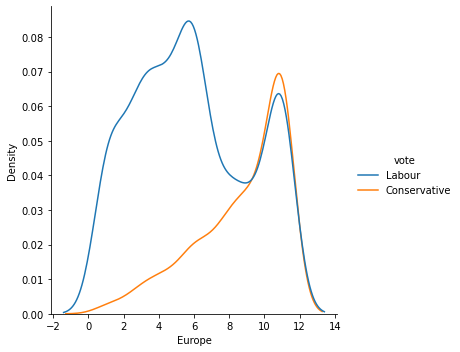

In [30]:
sns.displot(kind='kde', data=df, x='Europe', hue='vote')

In [31]:
df = df.replace({'vote':{'Labour':0, 'Conservative':1}, 'gender':{'male':0, 'female':1}})

In [32]:
df.describe()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
count,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000
mean,0.303230,54.241266,3.245221,3.137772,3.335531,2.749506,6.740277,1.540541,0.532630
std,0.459805,15.701741,0.881792,0.931069,1.174772,1.232479,3.299043,1.084417,0.499099
min,0.000000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000,0.000000
50%,0.000000,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000,1.000000
75%,1.000000,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000,1.000000
max,1.000000,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000,1.000000


In [33]:
df.corr()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
vote,1.000000,0.109274,-0.302280,-0.174688,-0.426606,0.468186,0.384612,0.111589,0.034464
age,0.109274,1.000000,0.018687,-0.038868,0.032084,0.031144,0.064562,-0.046598,0.017933
economic.cond.national,-0.302280,0.018687,1.000000,0.347687,0.326141,-0.200790,-0.209150,-0.023510,-0.055664
economic.cond.household,-0.174688,-0.038868,0.347687,1.000000,0.215822,-0.100392,-0.112897,-0.038528,-0.033102
Blair,-0.426606,0.032084,0.326141,0.215822,1.000000,-0.243508,-0.295944,-0.021299,-0.067624
Hague,0.468186,0.031144,-0.200790,-0.100392,-0.243508,1.000000,0.285738,-0.029906,0.028309
Europe,0.384612,0.064562,-0.209150,-0.112897,-0.295944,0.285738,1.000000,-0.151197,0.076059
political.knowledge,0.111589,-0.046598,-0.023510,-0.038528,-0.021299,-0.029906,-0.151197,1.000000,-0.156923
gender,0.034464,0.017933,-0.055664,-0.033102,-0.067624,0.028309,0.076059,-0.156923,1.000000


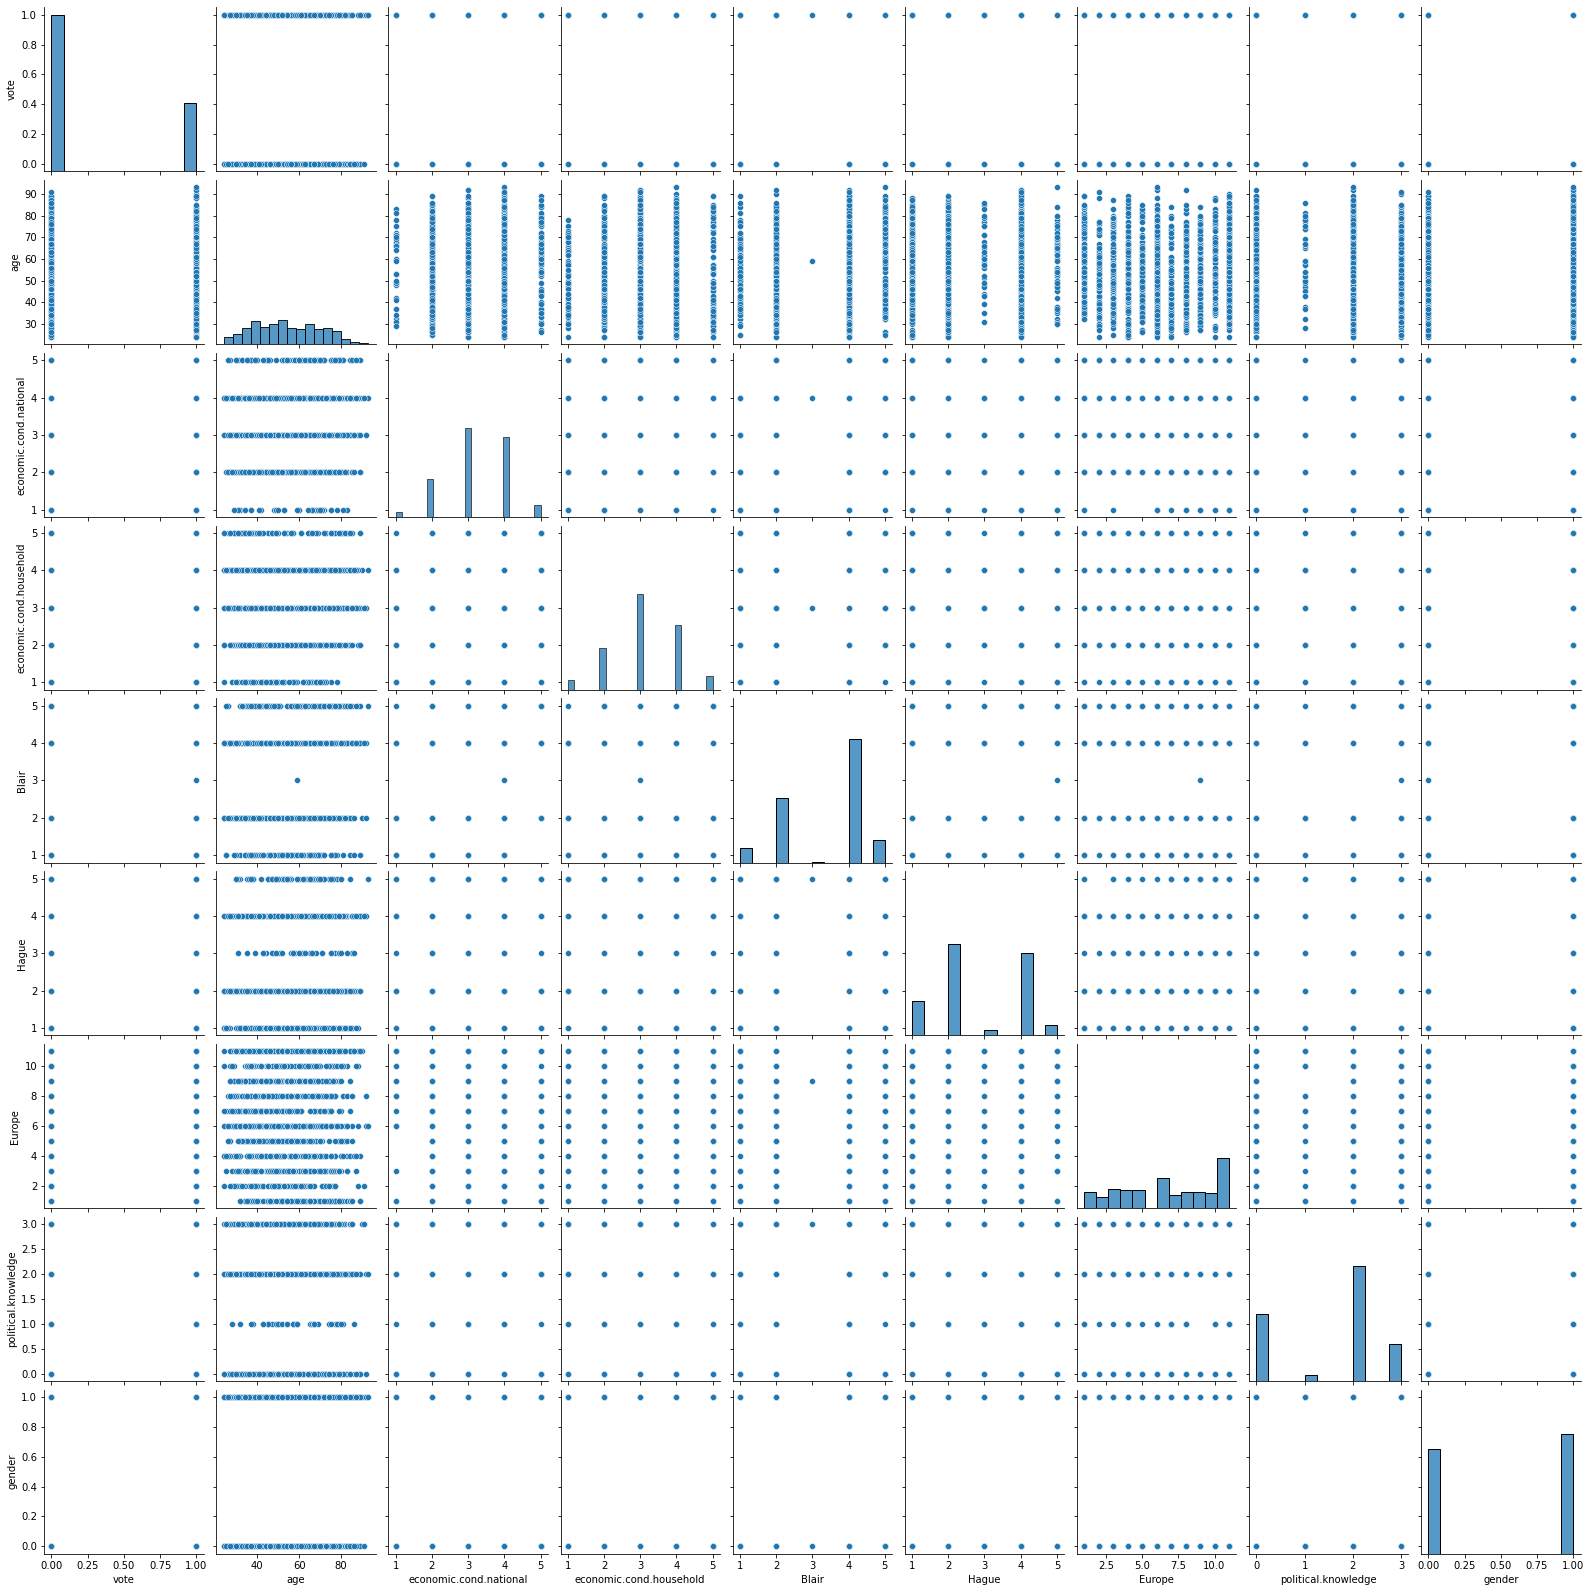

In [34]:
sns.pairplot(data=df)

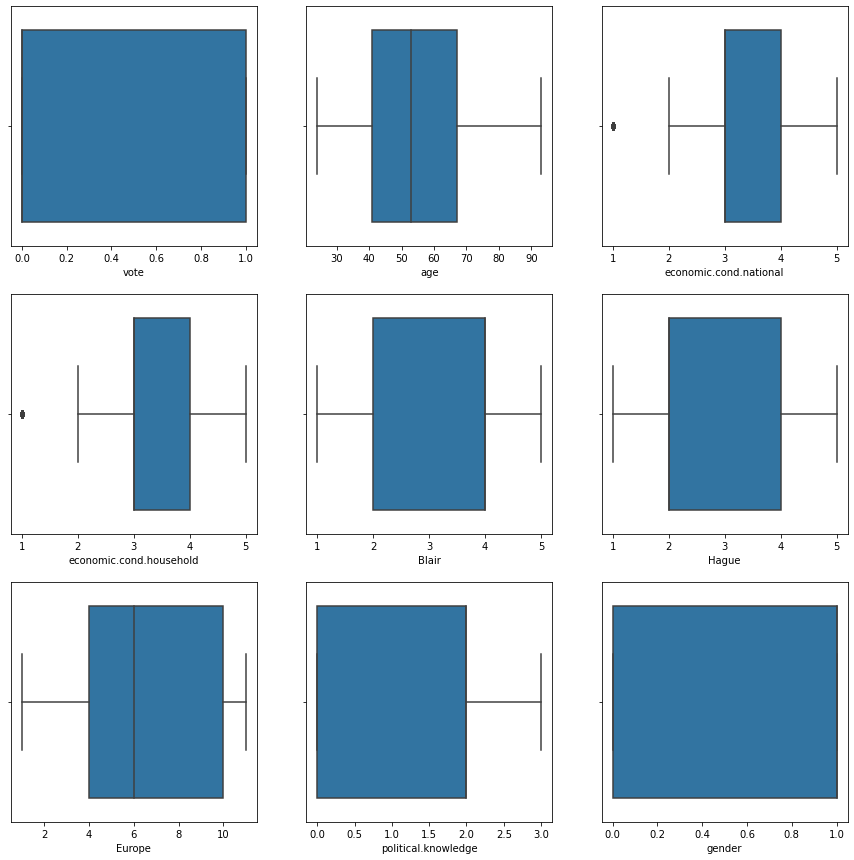

In [35]:
fig, axes = plt.subplots(nrows=3,ncols=3)
fig.set_size_inches(15,15)
column_names = df.columns

count=0
for i in range(3):
    for j in range(3):
        sns.boxplot(data=df, x=column_names[count], ax=axes[i][j]);
        count = count + 1
        if count>=len(column_names):
            break

In [36]:
X = df.drop('vote', axis=1)
y = df.pop('vote')

In [37]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,-0.716161,-0.278185,-0.148020,0.565802,-1.419969,-1.437338,0.423832,0.936736
1,-1.162118,0.856242,0.926367,0.565802,1.014951,-0.527684,0.423832,-1.067536
2,-1.225827,0.856242,0.926367,1.417312,-0.608329,-1.134120,0.423832,-1.067536
3,-1.926617,0.856242,-1.222408,-1.137217,-1.419969,-0.830902,-1.421084,0.936736
4,-0.843577,-1.412613,-1.222408,-1.988727,-1.419969,-0.224465,0.423832,-1.067536


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Logistic Regression

In [39]:
LR = LogisticRegression(random_state = 0)
LR = LR.fit(X_train,y_train)

In [40]:
y_pred_train = LR.predict(X_train)
y_pred_test = LR.predict(X_test)
print("Accuracy Score on training data is:  ", np.round(accuracy_score(y_train, y_pred_train),3))
print("Precision Score on training data is: ", np.round(precision_score(y_train, y_pred_train),3))
print("Recall Score on training data is:    ", np.round(recall_score(y_train, y_pred_train),3))
print("ROC_AUC Score on training data is:   ", np.round(roc_auc_score(y_train, y_pred_train),3))
print("\n")
print("Accuracy Score on testing data is:   ", np.round(accuracy_score(y_test, y_pred_test),3))
print("Precision Score on testing data is:  ", np.round(precision_score(y_test, y_pred_test),3))
print("Recall Score on testing data is:     ", np.round(recall_score(y_test, y_pred_test),3))
print("ROC_AUC Score on testing data is:    ", np.round(roc_auc_score(y_test, y_pred_test),3))

Accuracy Score on training data is:   0.833
Precision Score on training data is:  0.765
Recall Score on training data is:     0.665
ROC_AUC Score on training data is:    0.787


Accuracy Score on testing data is:    0.833
Precision Score on testing data is:   0.741
Recall Score on testing data is:      0.652
ROC_AUC Score on testing data is:     0.779


In [41]:
y_predicted_prob_test = LR.predict_proba(X_test)[:,1]
y_predicted_prob_train = LR.predict_proba(X_train)[:,1]

In [42]:
threshold=[]
accuracy = []
precision = []
recall = []
roc_auc = []

for thresh in np.arange(0.40,0.51,0.01):
    y_pred = np.where(y_predicted_prob_train>thresh, 1, 0)
    threshold.append(thresh)
    accuracy.append(accuracy_score(y_train, y_pred))
    precision.append(precision_score(y_train, y_pred))
    recall.append(recall_score(y_train,y_pred))
    roc_auc.append(roc_auc_score(y_train,y_pred))
    
LR_tune_df = pd.DataFrame({'Threshold':threshold, "Accuracy":accuracy, "Precision":precision, "Recall":recall, "ROC_AUC":roc_auc})
LR_tune_df

,Threshold,Accuracy,Precision,Recall,ROC_AUC
0,0.40,0.824694,0.707602,0.737805,0.800690
1,0.41,0.825636,0.710914,0.734756,0.800529
2,0.42,0.825636,0.714715,0.725610,0.798003
3,0.43,0.825636,0.720000,0.713415,0.794634
4,0.44,0.827521,0.727273,0.707317,0.794313
5,0.45,0.826579,0.729299,0.698171,0.791104
6,0.46,0.826579,0.730769,0.695122,0.790262
7,0.47,0.830349,0.741830,0.692073,0.792148
8,0.48,0.833176,0.752508,0.685976,0.792510
9,0.49,0.836004,0.763699,0.679878,0.792872


Text(0.5, 1.0, 'Grid Search')

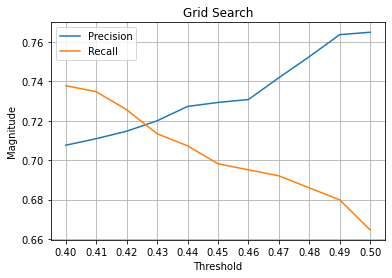

In [43]:
plt.plot(LR_tune_df['Threshold'],LR_tune_df['Precision'])
plt.plot(LR_tune_df['Threshold'],LR_tune_df['Recall'])
plt.legend(['Precision', 'Recall'])
plt.xticks(np.arange(0.40, 0.51, step=0.01))
plt.grid(True)
plt.xlabel("Threshold")
plt.ylabel("Magnitude")
plt.title("Grid Search")

In [44]:
y_pred_tuned_train = np.where(y_predicted_prob_train>0.428, 1, 0)
y_pred_tuned_test = np.where(y_predicted_prob_test>0.428, 1, 0)

## Training Data

In [45]:
print("Accuracy Score on training data is:  ", np.round(accuracy_score(y_train, y_pred_tuned_train),3))
print("Precision Score on training data is: ", np.round(precision_score(y_train, y_pred_tuned_train),3))
print("Recall Score on training data is:    ", np.round(recall_score(y_train, y_pred_tuned_train),3))
print("ROC_AUC Score on training data is:   ", np.round(roc_auc_score(y_train, y_pred_tuned_train),3))

Accuracy Score on training data is:   0.827
Precision Score on training data is:  0.72
Recall Score on training data is:     0.72
ROC_AUC Score on training data is:    0.797


In [46]:
print(confusion_matrix(y_train, y_pred_tuned_train))

[[641  92]
 [ 92 236]]


In [47]:
print(classification_report(y_train, y_pred_tuned_train))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       733
           1       0.72      0.72      0.72       328

    accuracy                           0.83      1061
   macro avg       0.80      0.80      0.80      1061
weighted avg       0.83      0.83      0.83      1061



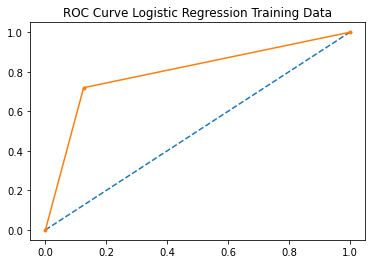

In [48]:
fpr, tpr, thresholds = roc_curve(y_train, y_pred_tuned_train)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title("ROC Curve Logistic Regression Training Data")
plt.show()

## Testing Data

In [49]:
print("Accuracy Score on testing data is:  ", np.round(accuracy_score(y_test, y_pred_tuned_test),3))
print("Precision Score on testing data is: ", np.round(precision_score(y_test, y_pred_tuned_test),3))
print("Recall Score on testing data is:    ", np.round(recall_score(y_test, y_pred_tuned_test),3))
print("ROC_AUC Score on testing data is:   ", np.round(roc_auc_score(y_test, y_pred_tuned_test),3))

Accuracy Score on testing data is:   0.831
Precision Score on testing data is:  0.707
Recall Score on testing data is:     0.712
ROC_AUC Score on testing data is:    0.796


In [50]:
print(confusion_matrix(y_test, y_pred_tuned_test))

[[285  39]
 [ 38  94]]


In [51]:
print(classification_report(y_test, y_pred_tuned_test))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       324
           1       0.71      0.71      0.71       132

    accuracy                           0.83       456
   macro avg       0.79      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456



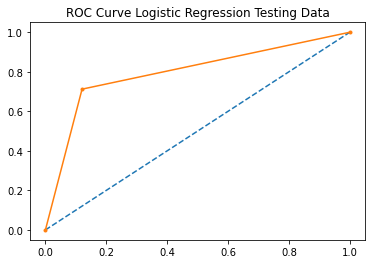

In [52]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_tuned_test)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title("ROC Curve Logistic Regression Testing Data")
plt.show()

# Linear Discriminant Analysis

In [53]:
LDA = LinearDiscriminantAnalysis()
LDA = LDA.fit(X_train,y_train)

In [54]:
y_pred_train = LDA.predict(X_train)
y_pred_test = LDA.predict(X_test)
print("Accuracy Score on training data is:  ", np.round(accuracy_score(y_train, y_pred_train),3))
print("Precision Score on training data is: ", np.round(precision_score(y_train, y_pred_train),3))
print("Recall Score on training data is:    ", np.round(recall_score(y_train, y_pred_train),3))
print("ROC_AUC Score on training data is:   ", np.round(roc_auc_score(y_train, y_pred_train),3))
print("\n")
print("Accuracy Score on testing data is:   ", np.round(accuracy_score(y_test, y_pred_test),3))
print("Precision Score on testing data is:  ", np.round(precision_score(y_test, y_pred_test),3))
print("Recall Score on testing data is:     ", np.round(recall_score(y_test, y_pred_test),3))
print("ROC_AUC Score on testing data is:    ", np.round(roc_auc_score(y_test, y_pred_test),3))

Accuracy Score on training data is:   0.831
Precision Score on training data is:  0.753
Recall Score on training data is:     0.677
ROC_AUC Score on training data is:    0.789


Accuracy Score on testing data is:    0.833
Precision Score on testing data is:   0.737
Recall Score on testing data is:      0.659
ROC_AUC Score on testing data is:     0.782


In [55]:
y_predicted_prob_test = LDA.predict_proba(X_test)[:,1]
y_predicted_prob_train = LDA.predict_proba(X_train)[:,1]

In [56]:
threshold=[]
accuracy = []
precision = []
recall = []
roc_auc = []

for thresh in np.arange(0.40,0.51,0.01):
    y_pred = np.where(y_predicted_prob_train>thresh, 1, 0)
    threshold.append(thresh)
    accuracy.append(accuracy_score(y_train, y_pred))
    precision.append(precision_score(y_train, y_pred))
    recall.append(recall_score(y_train,y_pred))
    roc_auc.append(roc_auc_score(y_train,y_pred))
    
LDA_tune_df = pd.DataFrame({'Threshold':threshold, "Accuracy":accuracy, "Precision":precision, "Recall":recall, "ROC_AUC":roc_auc})
LDA_tune_df

,Threshold,Accuracy,Precision,Recall,ROC_AUC
0,0.40,0.826579,0.710526,0.740854,0.802896
1,0.41,0.826579,0.713018,0.734756,0.801212
2,0.42,0.827521,0.715134,0.734756,0.801894
3,0.43,0.830349,0.722892,0.731707,0.803098
4,0.44,0.828464,0.723926,0.719512,0.798365
5,0.45,0.827521,0.724458,0.713415,0.795998
6,0.46,0.827521,0.724458,0.713415,0.795998
7,0.47,0.828464,0.732484,0.701220,0.793311
8,0.48,0.828464,0.740132,0.685976,0.789100
9,0.49,0.830349,0.746667,0.682927,0.789622


Text(0.5, 1.0, 'Grid Search')

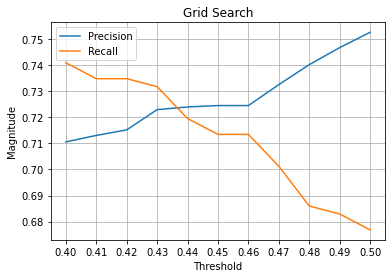

In [57]:
plt.plot(LDA_tune_df['Threshold'],LDA_tune_df['Precision'])
plt.plot(LDA_tune_df['Threshold'],LDA_tune_df['Recall'])
plt.legend(['Precision', 'Recall'])
plt.xticks(np.arange(0.40, 0.51, step=0.01))
plt.grid(True)
plt.xlabel("Threshold")
plt.ylabel("Magnitude")
plt.title("Grid Search")

In [58]:
y_pred_tuned_train = np.where(y_predicted_prob_train>0.436, 1, 0)
y_pred_tuned_test = np.where(y_predicted_prob_test>0.436, 1, 0)

In [59]:
print("Accuracy Score on training data is:  ", np.round(accuracy_score(y_train, y_pred_tuned_train),3))
print("Precision Score on training data is: ", np.round(precision_score(y_train, y_pred_tuned_train),3))
print("Recall Score on training data is:    ", np.round(recall_score(y_train, y_pred_tuned_train),3))
print("ROC_AUC Score on training data is:   ", np.round(roc_auc_score(y_train, y_pred_tuned_train),3))

Accuracy Score on training data is:   0.83
Precision Score on training data is:  0.726
Recall Score on training data is:     0.726
ROC_AUC Score on training data is:    0.801


In [60]:
print(confusion_matrix(y_train, y_pred_tuned_train))

[[643  90]
 [ 90 238]]


In [61]:
print(classification_report(y_train, y_pred_tuned_train))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       733
           1       0.73      0.73      0.73       328

    accuracy                           0.83      1061
   macro avg       0.80      0.80      0.80      1061
weighted avg       0.83      0.83      0.83      1061



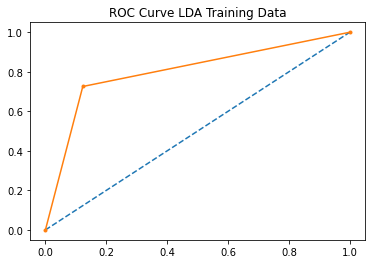

In [62]:
fpr, tpr, thresholds = roc_curve(y_train, y_pred_tuned_train)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title("ROC Curve LDA Training Data")
plt.show()

# Testing Data

In [63]:
print("Accuracy Score on testing data is:  ", np.round(accuracy_score(y_test, y_pred_tuned_test),3))
print("Precision Score on testing data is: ", np.round(precision_score(y_test, y_pred_tuned_test),3))
print("Recall Score on testing data is:    ", np.round(recall_score(y_test, y_pred_tuned_test),3))
print("ROC_AUC Score on testing data is:   ", np.round(roc_auc_score(y_test, y_pred_tuned_test),3))

Accuracy Score on testing data is:   0.833
Precision Score on testing data is:  0.715
Recall Score on testing data is:     0.705
ROC_AUC Score on testing data is:    0.795


In [64]:
print(confusion_matrix(y_test, y_pred_tuned_test))

[[287  37]
 [ 39  93]]


In [65]:
print(classification_report(y_test, y_pred_tuned_test))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       324
           1       0.72      0.70      0.71       132

    accuracy                           0.83       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456



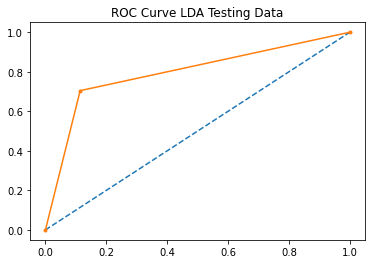

In [66]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_tuned_test)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title("ROC Curve LDA Testing Data")
plt.show()

# KNN

In [67]:
KNN = KNeighborsClassifier()
KNN = KNN.fit(X_train,y_train)

In [68]:
y_pred_train = KNN.predict(X_train)
y_pred_test = KNN.predict(X_test)
print("Accuracy Score on training data is:  ", np.round(accuracy_score(y_train, y_pred_train),3))
print("Precision Score on training data is: ", np.round(precision_score(y_train, y_pred_train),3))
print("Recall Score on training data is:    ", np.round(recall_score(y_train, y_pred_train),3))
print("ROC_AUC Score on training data is:   ", np.round(roc_auc_score(y_train, y_pred_train),3))
print("\n")
print("Accuracy Score on testing data is:   ", np.round(accuracy_score(y_test, y_pred_test),3))
print("Precision Score on testing data is:  ", np.round(precision_score(y_test, y_pred_test),3))
print("Recall Score on testing data is:     ", np.round(recall_score(y_test, y_pred_test),3))
print("ROC_AUC Score on testing data is:    ", np.round(roc_auc_score(y_test, y_pred_test),3))

Accuracy Score on training data is:   0.866
Precision Score on training data is:  0.8
Recall Score on training data is:     0.756
ROC_AUC Score on training data is:    0.836


Accuracy Score on testing data is:    0.829
Precision Score on testing data is:   0.708
Recall Score on testing data is:      0.697
ROC_AUC Score on testing data is:     0.79


In [69]:
neighbors=[]
accuracy = []
precision = []
recall = []
roc_auc = []

for i in range(2,15):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN = KNN.fit(X_train,y_train)
    y_pred = KNN.predict(X_train)
    neighbors.append(i)
    accuracy.append(accuracy_score(y_train, y_pred))
    precision.append(precision_score(y_train, y_pred))
    recall.append(recall_score(y_train,y_pred))
    roc_auc.append(roc_auc_score(y_train,y_pred))
    
KNN_tune_df = pd.DataFrame({'Neighbors':neighbors, "Accuracy":accuracy, "Precision":precision, "Recall":recall, "ROC_AUC":roc_auc})
KNN_tune_df

,Neighbors,Accuracy,Precision,Recall,ROC_AUC
0,2,0.880302,1.000000,0.612805,0.806402
1,3,0.881244,0.815625,0.795732,0.857620
2,4,0.866164,0.869048,0.667683,0.811331
3,5,0.866164,0.800000,0.756098,0.835757
4,6,0.861451,0.849421,0.670732,0.808763
5,7,0.860509,0.806122,0.722561,0.822399
6,8,0.852026,0.830116,0.655488,0.797730
7,9,0.847314,0.769481,0.722561,0.812849
8,10,0.849199,0.815789,0.661585,0.797368
9,11,0.839774,0.763333,0.698171,0.800654


Text(0.5, 1.0, 'Grid Search')

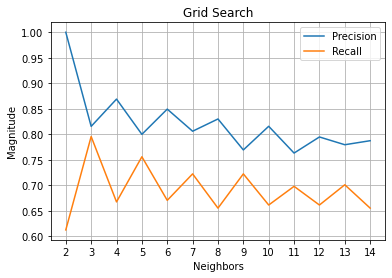

In [70]:
plt.plot(KNN_tune_df['Neighbors'],KNN_tune_df['Precision'])
plt.plot(KNN_tune_df['Neighbors'],KNN_tune_df['Recall'])
plt.legend(['Precision', 'Recall'])
plt.xticks(np.arange(2, 15, step=1))
plt.grid(True)
plt.xlabel("Neighbors")
plt.ylabel("Magnitude")
plt.title("Grid Search")

In [71]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN = KNN.fit(X_train,y_train)
y_pred_tuned_train = KNN.predict(X_train)
y_pred_tuned_test = KNN.predict(X_test)

In [72]:
print("Accuracy Score on training data is:  ", np.round(accuracy_score(y_train, y_pred_tuned_train),3))
print("Precision Score on training data is: ", np.round(precision_score(y_train, y_pred_tuned_train),3))
print("Recall Score on training data is:    ", np.round(recall_score(y_train, y_pred_tuned_train),3))
print("ROC_AUC Score on training data is:   ", np.round(roc_auc_score(y_train, y_pred_tuned_train),3))

Accuracy Score on training data is:   0.881
Precision Score on training data is:  0.816
Recall Score on training data is:     0.796
ROC_AUC Score on training data is:    0.858


In [73]:
print(confusion_matrix(y_train, y_pred_tuned_train))

[[674  59]
 [ 67 261]]


In [74]:
print(classification_report(y_train, y_pred_tuned_train))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       733
           1       0.82      0.80      0.81       328

    accuracy                           0.88      1061
   macro avg       0.86      0.86      0.86      1061
weighted avg       0.88      0.88      0.88      1061



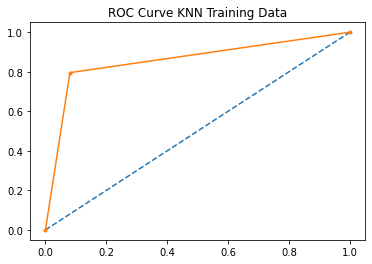

In [75]:
fpr, tpr, thresholds = roc_curve(y_train, y_pred_tuned_train)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title("ROC Curve KNN Training Data")
plt.show()

## Testing Data

In [76]:
print("Accuracy Score on testing data is:  ", np.round(accuracy_score(y_test, y_pred_tuned_test),3))
print("Precision Score on testing data is: ", np.round(precision_score(y_test, y_pred_tuned_test),3))
print("Recall Score on testing data is:    ", np.round(recall_score(y_test, y_pred_tuned_test),3))
print("ROC_AUC Score on testing data is:   ", np.round(roc_auc_score(y_test, y_pred_tuned_test),3))

Accuracy Score on testing data is:   0.807
Precision Score on testing data is:  0.664
Recall Score on testing data is:     0.674
ROC_AUC Score on testing data is:    0.768


In [77]:
print(confusion_matrix(y_test, y_pred_tuned_test))

[[279  45]
 [ 43  89]]


In [78]:
print(classification_report(y_test, y_pred_tuned_test))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       324
           1       0.66      0.67      0.67       132

    accuracy                           0.81       456
   macro avg       0.77      0.77      0.77       456
weighted avg       0.81      0.81      0.81       456



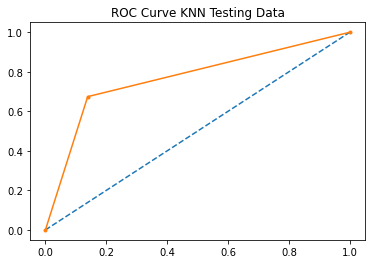

In [79]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_tuned_test)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title("ROC Curve KNN Testing Data")
plt.show()

# Naive Baeyes

In [80]:
NB = GaussianNB()
NB = NB.fit(X_train,y_train)

In [81]:
y_pred_train = NB.predict(X_train)
y_pred_test = NB.predict(X_test)
print("Accuracy Score on training data is:  ", np.round(accuracy_score(y_train, y_pred_train),3))
print("Precision Score on training data is: ", np.round(precision_score(y_train, y_pred_train),3))
print("Recall Score on training data is:    ", np.round(recall_score(y_train, y_pred_train),3))
print("ROC_AUC Score on training data is:   ", np.round(roc_auc_score(y_train, y_pred_train),3))
print("\n")
print("Accuracy Score on testing data is:   ", np.round(accuracy_score(y_test, y_pred_test),3))
print("Precision Score on testing data is:  ", np.round(precision_score(y_test, y_pred_test),3))
print("Recall Score on testing data is:     ", np.round(recall_score(y_test, y_pred_test),3))
print("ROC_AUC Score on testing data is:    ", np.round(roc_auc_score(y_test, y_pred_test),3))

Accuracy Score on training data is:   0.826
Precision Score on training data is:  0.726
Recall Score on training data is:     0.701
ROC_AUC Score on training data is:    0.791


Accuracy Score on testing data is:    0.846
Precision Score on testing data is:   0.742
Recall Score on testing data is:      0.72
ROC_AUC Score on testing data is:     0.809


In [82]:
y_predicted_prob_test = NB.predict_proba(X_test)[:,1]
y_predicted_prob_train = NB.predict_proba(X_train)[:,1]

In [83]:
threshold=[]
accuracy = []
precision = []
recall = []
roc_auc = []

for thresh in np.arange(0.40,0.51,0.01):
    y_pred = np.where(y_predicted_prob_train>thresh, 1, 0)
    threshold.append(thresh)
    accuracy.append(accuracy_score(y_train, y_pred))
    precision.append(precision_score(y_train, y_pred))
    recall.append(recall_score(y_train,y_pred))
    roc_auc.append(roc_auc_score(y_train,y_pred))
    
NB_tune_df = pd.DataFrame({'Threshold':threshold, "Accuracy":accuracy, "Precision":precision, "Recall":recall, "ROC_AUC":roc_auc})
NB_tune_df

,Threshold,Accuracy,Precision,Recall,ROC_AUC
0,0.40,0.816211,0.688385,0.740854,0.795393
1,0.41,0.816211,0.689459,0.737805,0.794550
2,0.42,0.823751,0.705539,0.737805,0.800007
3,0.43,0.820924,0.702941,0.728659,0.795434
4,0.44,0.819981,0.703264,0.722561,0.793068
5,0.45,0.822809,0.709581,0.722561,0.795114
6,0.46,0.824694,0.713855,0.722561,0.796478
7,0.47,0.826579,0.720859,0.716463,0.796158
8,0.48,0.824694,0.720497,0.707317,0.792267
9,0.49,0.825636,0.724138,0.704268,0.792107


Text(0.5, 1.0, 'Grid Search')

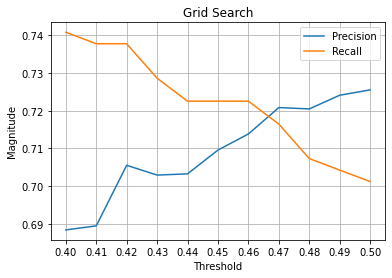

In [84]:
plt.plot(NB_tune_df['Threshold'],NB_tune_df['Precision'])
plt.plot(NB_tune_df['Threshold'],NB_tune_df['Recall'])
plt.legend(['Precision', 'Recall'])
plt.xticks(np.arange(0.40, 0.51, step=0.01))
plt.grid(True)
plt.xlabel("Threshold")
plt.ylabel("Magnitude")
plt.title("Grid Search")

In [85]:
y_pred_tuned_train = np.where(y_predicted_prob_train>0.468, 1, 0)
y_pred_tuned_test = np.where(y_predicted_prob_test>0.468, 1, 0)

In [86]:
print("Accuracy Score on training data is:  ", np.round(accuracy_score(y_train, y_pred_tuned_train),3))
print("Precision Score on training data is: ", np.round(precision_score(y_train, y_pred_tuned_train),3))
print("Recall Score on training data is:    ", np.round(recall_score(y_train, y_pred_tuned_train),3))
print("ROC_AUC Score on training data is:   ", np.round(roc_auc_score(y_train, y_pred_tuned_train),3))

Accuracy Score on training data is:   0.825
Precision Score on training data is:  0.716
Recall Score on training data is:     0.716
ROC_AUC Score on training data is:    0.795


In [87]:
print(confusion_matrix(y_train, y_pred_tuned_train))

[[640  93]
 [ 93 235]]


In [88]:
print(classification_report(y_train, y_pred_tuned_train))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       733
           1       0.72      0.72      0.72       328

    accuracy                           0.82      1061
   macro avg       0.79      0.79      0.79      1061
weighted avg       0.82      0.82      0.82      1061



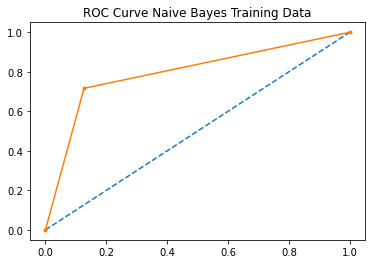

In [89]:
fpr, tpr, thresholds = roc_curve(y_train, y_pred_tuned_train)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title("ROC Curve Naive Bayes Training Data")
plt.show()

In [90]:
print("Accuracy Score on testing data is:  ", np.round(accuracy_score(y_test, y_pred_tuned_test),3))
print("Precision Score on testing data is: ", np.round(precision_score(y_test, y_pred_tuned_test),3))
print("Recall Score on testing data is:    ", np.round(recall_score(y_test, y_pred_tuned_test),3))
print("ROC_AUC Score on testing data is:   ", np.round(roc_auc_score(y_test, y_pred_tuned_test),3))

Accuracy Score on testing data is:   0.836
Precision Score on testing data is:  0.711
Recall Score on testing data is:     0.727
ROC_AUC Score on testing data is:    0.803


In [91]:
print(confusion_matrix(y_test, y_pred_tuned_test))

[[285  39]
 [ 36  96]]


In [92]:
print(classification_report(y_test, y_pred_tuned_test))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88       324
           1       0.71      0.73      0.72       132

    accuracy                           0.84       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.84      0.84      0.84       456



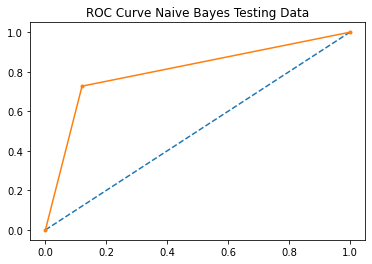

In [93]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_tuned_test)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title("ROC Curve Naive Bayes Testing Data")
plt.show()

# Random Forest

In [94]:
RF = RandomForestClassifier(random_state=0)
RF = RF.fit(X_train,y_train)

In [95]:
y_pred_train = RF.predict(X_train)
y_pred_test = RF.predict(X_test)
print("Accuracy Score on training data is:  ", np.round(accuracy_score(y_train, y_pred_train),3))
print("Precision Score on training data is: ", np.round(precision_score(y_train, y_pred_train),3))
print("Recall Score on training data is:    ", np.round(recall_score(y_train, y_pred_train),3))
print("ROC_AUC Score on training data is:   ", np.round(roc_auc_score(y_train, y_pred_train),3))
print("\n")
print("Accuracy Score on testing data is:   ", np.round(accuracy_score(y_test, y_pred_test),3))
print("Precision Score on testing data is:  ", np.round(precision_score(y_test, y_pred_test),3))
print("Recall Score on testing data is:     ", np.round(recall_score(y_test, y_pred_test),3))
print("ROC_AUC Score on testing data is:    ", np.round(roc_auc_score(y_test, y_pred_test),3))

Accuracy Score on training data is:   1.0
Precision Score on training data is:  1.0
Recall Score on training data is:     1.0
ROC_AUC Score on training data is:    1.0


Accuracy Score on testing data is:    0.827
Precision Score on testing data is:   0.723
Recall Score on testing data is:      0.652
ROC_AUC Score on testing data is:     0.775


In [96]:
max_depth=[]
accuracy = []
precision = []
recall = []
roc_auc = []

for i in range(1,8):
    RF = RandomForestClassifier(max_depth=i, random_state=0)
    RF = RF.fit(X_train,y_train)
    y_pred = RF.predict(X_test)
    max_depth.append(i)
    accuracy.append(accuracy_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred))
    recall.append(recall_score(y_test,y_pred))
    roc_auc.append(roc_auc_score(y_test,y_pred))
    
RF_tune_df = pd.DataFrame({'Max Depth':max_depth, "Accuracy":accuracy, "Precision":precision, "Recall":recall, "ROC_AUC":roc_auc})
RF_tune_df

,Max Depth,Accuracy,Precision,Recall,ROC_AUC
0,1,0.719298,1.000000,0.030303,0.515152
1,2,0.804825,0.852459,0.393939,0.683081
2,3,0.815789,0.807692,0.477273,0.715488
3,4,0.831140,0.783505,0.575758,0.755471
4,5,0.848684,0.794393,0.643939,0.788019
5,6,0.837719,0.758929,0.643939,0.780303
6,7,0.835526,0.743590,0.659091,0.783249


Text(0.5, 1.0, 'Grid Search')

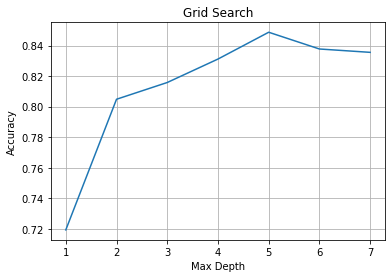

In [97]:
plt.plot(RF_tune_df['Max Depth'],RF_tune_df['Accuracy'])
plt.xticks(np.arange(1, 8, step=1))
plt.grid(True)
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Grid Search")

In [98]:
RF = RandomForestClassifier(max_depth=5, random_state=0)
RF = RF.fit(X_train,y_train)
y_predicted_prob_train = RF.predict_proba(X_train)[:,1]
y_predicted_prob_test = RF.predict_proba(X_test)[:,1]

In [99]:
threshold=[]
accuracy = []
precision = []
recall = []
roc_auc = []

for thresh in np.arange(0.40,0.51,0.01):
    y_pred = np.where(y_predicted_prob_train>thresh, 1, 0)
    threshold.append(thresh)
    accuracy.append(accuracy_score(y_train, y_pred))
    precision.append(precision_score(y_train, y_pred))
    recall.append(recall_score(y_train,y_pred))
    roc_auc.append(roc_auc_score(y_train,y_pred))
    
RF_tune_df = pd.DataFrame({'Threshold':threshold, "Accuracy":accuracy, "Precision":precision, "Recall":recall, "ROC_AUC":roc_auc})
RF_tune_df

,Threshold,Accuracy,Precision,Recall,ROC_AUC
0,0.40,0.859566,0.749304,0.820122,0.848669
1,0.41,0.866164,0.767241,0.814024,0.851760
2,0.42,0.864279,0.772189,0.795732,0.845342
3,0.43,0.864279,0.783951,0.774390,0.839446
4,0.44,0.866164,0.801948,0.753049,0.834915
5,0.45,0.867107,0.808581,0.746951,0.833912
6,0.46,0.868049,0.817568,0.737805,0.832068
7,0.47,0.868049,0.819728,0.734756,0.831225
8,0.48,0.869934,0.829861,0.728659,0.830905
9,0.49,0.868049,0.835714,0.713415,0.825329


Text(0.5, 1.0, 'Grid Search')

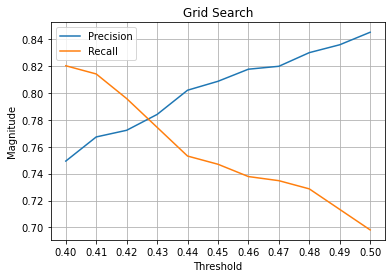

In [100]:
plt.plot(RF_tune_df['Threshold'],RF_tune_df['Precision'])
plt.plot(RF_tune_df['Threshold'],RF_tune_df['Recall'])
plt.legend(['Precision', 'Recall'])
plt.xticks(np.arange(0.40, 0.51, step=0.01))
plt.grid(True)
plt.xlabel("Threshold")
plt.ylabel("Magnitude")
plt.title("Grid Search")

In [101]:
y_pred_tuned_train = np.where(y_predicted_prob_train>0.427, 1, 0)
y_pred_tuned_test = np.where(y_predicted_prob_test>0.427, 1, 0)

In [102]:
print("Accuracy Score on training data is:  ", np.round(accuracy_score(y_train, y_pred_tuned_train),3))
print("Precision Score on training data is: ", np.round(precision_score(y_train, y_pred_tuned_train),3))
print("Recall Score on training data is:    ", np.round(recall_score(y_train, y_pred_tuned_train),3))
print("ROC_AUC Score on training data is:   ", np.round(roc_auc_score(y_train, y_pred_tuned_train),3))

Accuracy Score on training data is:   0.866
Precision Score on training data is:  0.784
Recall Score on training data is:     0.784
ROC_AUC Score on training data is:    0.843


In [103]:
print(confusion_matrix(y_train, y_pred_tuned_train))

[[662  71]
 [ 71 257]]


In [104]:
print(classification_report(y_train, y_pred_tuned_train))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       733
           1       0.78      0.78      0.78       328

    accuracy                           0.87      1061
   macro avg       0.84      0.84      0.84      1061
weighted avg       0.87      0.87      0.87      1061



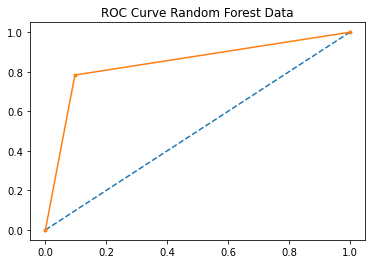

In [105]:
fpr, tpr, thresholds = roc_curve(y_train, y_pred_tuned_train)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title("ROC Curve Random Forest Data")
plt.show()

In [106]:
print("Accuracy Score on testing data is:  ", np.round(accuracy_score(y_test, y_pred_tuned_test),3))
print("Precision Score on testing data is: ", np.round(precision_score(y_test, y_pred_tuned_test),3))
print("Recall Score on testing data is:    ", np.round(recall_score(y_test, y_pred_tuned_test),3))
print("ROC_AUC Score on testing data is:   ", np.round(roc_auc_score(y_test, y_pred_tuned_test),3))

Accuracy Score on testing data is:   0.844
Precision Score on testing data is:  0.733
Recall Score on testing data is:     0.727
ROC_AUC Score on testing data is:    0.81


In [107]:
print(confusion_matrix(y_test, y_pred_tuned_test))

[[289  35]
 [ 36  96]]


In [108]:
print(classification_report(y_test, y_pred_tuned_test))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       324
           1       0.73      0.73      0.73       132

    accuracy                           0.84       456
   macro avg       0.81      0.81      0.81       456
weighted avg       0.84      0.84      0.84       456



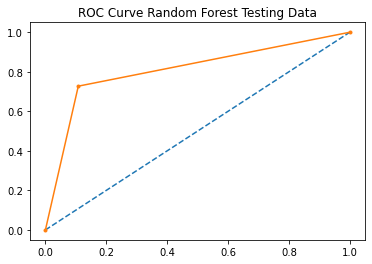

In [109]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_tuned_test)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title("ROC Curve Random Forest Testing Data")
plt.show()

# Gradient Boosting

In [110]:
GB = GradientBoostingClassifier(random_state=0)
GB = GB.fit(X_train,y_train)

In [111]:
y_pred_train = GB.predict(X_train)
y_pred_test = GB.predict(X_test)
print("Accuracy Score on training data is:  ", np.round(accuracy_score(y_train, y_pred_train),3))
print("Precision Score on training data is: ", np.round(precision_score(y_train, y_pred_train),3))
print("Recall Score on training data is:    ", np.round(recall_score(y_train, y_pred_train),3))
print("ROC_AUC Score on training data is:   ", np.round(roc_auc_score(y_train, y_pred_train),3))
print("\n")
print("Accuracy Score on testing data is:   ", np.round(accuracy_score(y_test, y_pred_test),3))
print("Precision Score on testing data is:  ", np.round(precision_score(y_test, y_pred_test),3))
print("Recall Score on testing data is:     ", np.round(recall_score(y_test, y_pred_test),3))
print("ROC_AUC Score on testing data is:    ", np.round(roc_auc_score(y_test, y_pred_test),3))

Accuracy Score on training data is:   0.885
Precision Score on training data is:  0.828
Recall Score on training data is:     0.793
ROC_AUC Score on training data is:    0.86


Accuracy Score on testing data is:    0.846
Precision Score on testing data is:   0.75
Recall Score on testing data is:      0.705
ROC_AUC Score on testing data is:     0.804


In [112]:
max_depth=[]
accuracy = []
precision = []
recall = []
roc_auc = []

for i in range(1,8):
    GB = GradientBoostingClassifier(max_depth=i,random_state=0)
    GB = GB.fit(X_train,y_train)
    y_pred = GB.predict(X_test)
    max_depth.append(i)
    accuracy.append(accuracy_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred))
    recall.append(recall_score(y_test,y_pred))
    roc_auc.append(roc_auc_score(y_test,y_pred))
    
GB_tune_df = pd.DataFrame({'Max Depth':max_depth, "Accuracy":accuracy, "Precision":precision, "Recall":recall, "ROC_AUC":roc_auc})
GB_tune_df

,Max Depth,Accuracy,Precision,Recall,ROC_AUC
0,1,0.833333,0.759259,0.621212,0.770483
1,2,0.842105,0.734375,0.712121,0.803591
2,3,0.846491,0.750000,0.704545,0.804433
3,4,0.848684,0.744186,0.727273,0.812710
4,5,0.822368,0.710744,0.651515,0.771745
5,6,0.817982,0.692913,0.666667,0.773148
6,7,0.811404,0.676923,0.666667,0.768519


Text(0.5, 1.0, 'Grid Search')

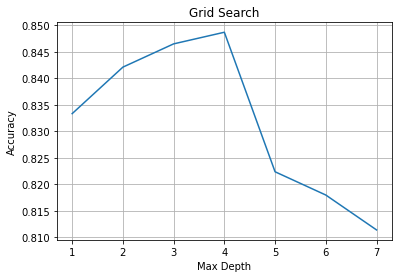

In [113]:
plt.plot(GB_tune_df['Max Depth'],GB_tune_df['Accuracy'])
plt.xticks(np.arange(1, 8, step=1))
plt.grid(True)
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Grid Search")

In [114]:
GB = GradientBoostingClassifier(max_depth=4, random_state=0)
GB = GB.fit(X_train,y_train)
y_predicted_prob_train = GB.predict_proba(X_train)[:,1]
y_predicted_prob_test = GB.predict_proba(X_test)[:,1]

In [115]:
threshold=[]
accuracy = []
precision = []
recall = []
roc_auc = []

for thresh in np.arange(0.40,0.51,0.01):
    y_pred = np.where(y_predicted_prob_train>thresh, 1, 0)
    threshold.append(thresh)
    accuracy.append(accuracy_score(y_train, y_pred))
    precision.append(precision_score(y_train, y_pred))
    recall.append(recall_score(y_train,y_pred))
    roc_auc.append(roc_auc_score(y_train,y_pred))
    
GB_tune_df = pd.DataFrame({'Threshold':threshold, "Accuracy":accuracy, "Precision":precision, "Recall":recall, "ROC_AUC":roc_auc})
GB_tune_df

,Threshold,Accuracy,Precision,Recall,ROC_AUC
0,0.40,0.920829,0.844633,0.911585,0.918276
1,0.41,0.922714,0.851429,0.908537,0.918798
2,0.42,0.926484,0.861272,0.908537,0.921526
3,0.43,0.925542,0.860870,0.905488,0.920002
4,0.44,0.925542,0.862974,0.902439,0.919159
5,0.45,0.926484,0.867647,0.899390,0.918999
6,0.46,0.923657,0.870871,0.884146,0.912742
7,0.47,0.923657,0.875380,0.878049,0.911057
8,0.48,0.921772,0.876923,0.868902,0.907166
9,0.49,0.922714,0.881988,0.865854,0.907006


Text(0.5, 1.0, 'Grid Search')

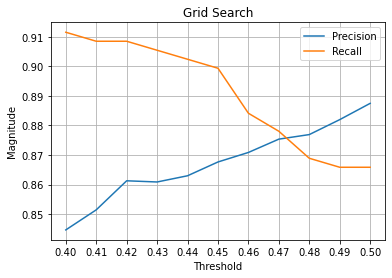

In [116]:
plt.plot(GB_tune_df['Threshold'],GB_tune_df['Precision'])
plt.plot(GB_tune_df['Threshold'],GB_tune_df['Recall'])
plt.legend(['Precision', 'Recall'])
plt.xticks(np.arange(0.40, 0.51, step=0.01))
plt.grid(True)
plt.xlabel("Threshold")
plt.ylabel("Magnitude")
plt.title("Grid Search")

In [117]:
y_pred_tuned_train = np.where(y_predicted_prob_train>0.475, 1, 0)
y_pred_tuned_test = np.where(y_predicted_prob_test>0.475, 1, 0)

## Training Data

In [118]:
print("Accuracy Score on training data is:  ", np.round(accuracy_score(y_train, y_pred_tuned_train),3))
print("Precision Score on training data is: ", np.round(precision_score(y_train, y_pred_tuned_train),3))
print("Recall Score on training data is:    ", np.round(recall_score(y_train, y_pred_tuned_train),3))
print("ROC_AUC Score on training data is:   ", np.round(roc_auc_score(y_train, y_pred_tuned_train),3))

Accuracy Score on training data is:   0.923
Precision Score on training data is:  0.875
Recall Score on training data is:     0.875
ROC_AUC Score on training data is:    0.91


In [119]:
print(confusion_matrix(y_train, y_pred_tuned_train))

[[692  41]
 [ 41 287]]


In [120]:
print(classification_report(y_train, y_pred_tuned_train))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       733
           1       0.88      0.88      0.88       328

    accuracy                           0.92      1061
   macro avg       0.91      0.91      0.91      1061
weighted avg       0.92      0.92      0.92      1061



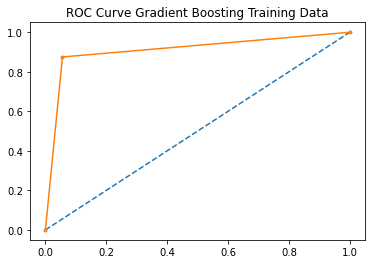

In [121]:
fpr, tpr, thresholds = roc_curve(y_train, y_pred_tuned_train)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title("ROC Curve Gradient Boosting Training Data")
plt.show()

## Testing data

In [122]:
print("Accuracy Score on testing data is:  ", np.round(accuracy_score(y_test, y_pred_tuned_test),3))
print("Precision Score on testing data is: ", np.round(precision_score(y_test, y_pred_tuned_test),3))
print("Recall Score on testing data is:    ", np.round(recall_score(y_test, y_pred_tuned_test),3))
print("ROC_AUC Score on testing data is:   ", np.round(roc_auc_score(y_test, y_pred_tuned_test),3))

Accuracy Score on testing data is:   0.849
Precision Score on testing data is:  0.74
Recall Score on testing data is:     0.735
ROC_AUC Score on testing data is:    0.815


In [123]:
print(confusion_matrix(y_test, y_pred_tuned_test))

[[290  34]
 [ 35  97]]


In [124]:
print(classification_report(y_test, y_pred_tuned_test))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       324
           1       0.74      0.73      0.74       132

    accuracy                           0.85       456
   macro avg       0.82      0.81      0.82       456
weighted avg       0.85      0.85      0.85       456



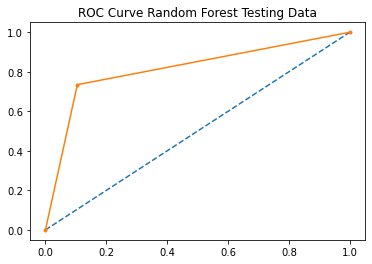

In [125]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_tuned_test)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title("ROC Curve Random Forest Testing Data")
plt.show()

In [126]:
X_test

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1224,1.003961,-0.278185,-0.148020,-1.137217,-0.608329,-0.527684,1.346290,-1.067536
580,-0.525036,-0.278185,-0.148020,-1.137217,1.014951,-0.224465,-1.421084,0.936736
9,1.003961,-0.278185,-1.222408,1.417312,-1.419969,1.291625,0.423832,-1.067536
686,-0.270203,-1.412613,0.926367,-1.137217,1.826592,1.291625,0.423832,0.936736
685,1.067669,-0.278185,-0.148020,-1.137217,1.014951,-0.527684,0.423832,0.936736
...,...,...,...,...,...,...,...,...
259,1.449918,0.856242,-0.148020,0.565802,1.014951,-0.830902,0.423832,0.936736
481,1.003961,0.856242,-0.148020,0.565802,-0.608329,-1.134120,1.346290,-1.067536
1364,-0.525036,0.856242,0.926367,0.565802,1.014951,-1.740556,0.423832,-1.067536
842,-0.970994,0.856242,0.926367,-1.137217,1.014951,0.381971,-1.421084,0.936736


In [127]:
test_df = df.iloc[list(X_test.index),:]

In [128]:
test_df["y_pred"] = y_pred_tuned_test

C:\Users\rkeswani\AppData\Local\Temp\ipykernel_8168\2173829616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["y_pred"] = y_pred_tuned_test


In [129]:
test_df.describe()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender,y_pred
count,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000
mean,54.407895,3.234649,3.188596,3.375000,2.655702,6.780702,1.517544,0.515351,0.287281
std,15.835149,0.864301,0.937357,1.124038,1.217947,3.262194,1.064780,0.500313,0.452991
min,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,40.750000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000,0.000000,0.000000
50%,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000,1.000000,0.000000
75%,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000,1.000000,1.000000
max,92.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000,1.000000,1.000000


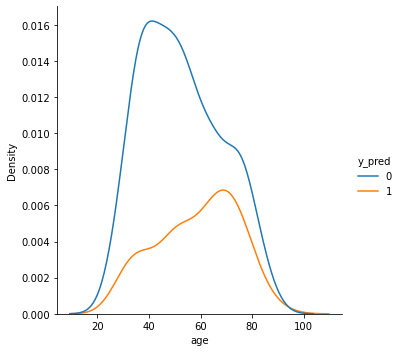

In [130]:
sns.displot(data=test_df, kind='kde', x='age', hue='y_pred')

<AxesSubplot:xlabel='economic.cond.national', ylabel='count'>

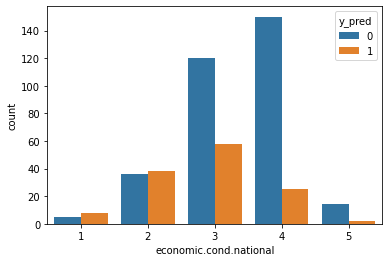

In [131]:
sns.countplot(data=test_df, x='economic.cond.national', hue='y_pred')

In [132]:
print("Average Hague rating of people predicted to vote for Labour Party:", test_df[test_df["y_pred"] == 0]["Hague"].mean())
print("Average Blair rating of people predicted to vote for Labour Party:", test_df[test_df["y_pred"] == 0]["Blair"].mean())

Average Hague rating of people predicted to vote for Labour Party: 2.249230769230769
Average Blair rating of people predicted to vote for Labour Party: 3.7784615384615385


In [133]:
print("Average Hague rating of people predicted to vote for Conservative Party:", test_df[test_df["y_pred"] == 1]["Hague"].mean())
print("Average Blair rating of people predicted to vote for Conservative Party:", test_df[test_df["y_pred"] == 1]["Blair"].mean())

Average Hague rating of people predicted to vote for Conservative Party: 3.66412213740458
Average Blair rating of people predicted to vote for Conservative Party: 2.3740458015267176


In [134]:
print("Average rating of Eurosceptic sentiment of people predicted to vote for Labour Party:", test_df[test_df["y_pred"] == 0]["Europe"].mean())
print("Average rating of Eurosceptic sentiment of people predicted to vote for Conservative Party:", test_df[test_df["y_pred"] == 1]["Europe"].mean())

Average rating of Eurosceptic sentiment of people predicted to vote for Labour Party: 5.753846153846154
Average rating of Eurosceptic sentiment of people predicted to vote for Conservative Party: 9.32824427480916
